# This is our coding for second model to predicts the maximum daily price category based on the provided weather data.

##### Let's start with loading some library; 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from scipy.stats import stats

In [2]:
result = pd.read_csv('result.csv')

##### The first step is to look at our DataFrame so we use the code to see all columns. 

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
result

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Average temperature (°C),Temperature range (°C),Max_Demand,Max_Price_Category
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3,22.75,14.3,5019.64,LOW
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5,23.70,10.6,4964.35,LOW
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2,21.60,9.2,4503.31,LOW
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0,17.30,2.6,4764.18,LOW
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3,17.50,3.2,4800.64,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,26/08/2021,5.5,12.9,1.2,2.4,1.0,SE,31.0,12:54,9.2,82.0,7,,Calm,1022.7,12.2,55,7.0,SSE,13,1020.3,9.20,7.4,7126.76,EXTREME
233,27/08/2021,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,88.0,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4,9.10,9.0,6769.89,EXTREME
234,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,80.0,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5,11.55,12.5,5716.32,MEDIUM
235,29/08/2021,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,79.0,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4,12.65,7.1,6227.89,EXTREME


##### Checking more detail of our DataFrame 

In [5]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               237 non-null    object 
 1   Minimum temperature (°C)           237 non-null    float64
 2   Maximum temperature (°C)           237 non-null    float64
 3   Rainfall (mm)                      237 non-null    float64
 4   Evaporation (mm)                   237 non-null    float64
 5   Sunshine (hours)                   237 non-null    float64
 6   Direction of maximum wind gust     237 non-null    object 
 7   Speed of maximum wind gust (km/h)  237 non-null    float64
 8   Time of maximum wind gust          237 non-null    object 
 9   9am Temperature (°C)               237 non-null    float64
 10  9am relative humidity (%)          237 non-null    float64
 11  9am cloud amount (oktas)           237 non-null    int64  

##### We expect  data for '9am wind speed (km/h)' to be numerical but it looks it is objects. but '3pm wind speed(km/h)' saved as strings.

In [6]:
result['9am wind speed (km/h)'] 

0         2
1        17
2         4
3        11
4        13
       ... 
232    Calm
233    Calm
234       7
235      13
236      15
Name: 9am wind speed (km/h), Length: 237, dtype: object

##### We change  'Calm' to 1 as minimum value for '9am wind speed (km/h)'  is: 2

In [7]:
result=result.replace(to_replace="Calm",value='1')

In [8]:
result['9am wind speed (km/h)'] = result['9am wind speed (km/h)'].astype(int)
result['3pm wind speed (km/h)'] = result['3pm wind speed (km/h)'].astype(int) 

In [9]:
result['9am wind speed (km/h)'].min()

1

In [10]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               237 non-null    object 
 1   Minimum temperature (°C)           237 non-null    float64
 2   Maximum temperature (°C)           237 non-null    float64
 3   Rainfall (mm)                      237 non-null    float64
 4   Evaporation (mm)                   237 non-null    float64
 5   Sunshine (hours)                   237 non-null    float64
 6   Direction of maximum wind gust     237 non-null    object 
 7   Speed of maximum wind gust (km/h)  237 non-null    float64
 8   Time of maximum wind gust          237 non-null    object 
 9   9am Temperature (°C)               237 non-null    float64
 10  9am relative humidity (%)          237 non-null    float64
 11  9am cloud amount (oktas)           237 non-null    int64  

In [11]:
result['3pm wind speed (km/h)'] 

0      13
1       4
2       2
3      17
4      19
       ..
232    13
233     7
234    24
235     6
236    28
Name: 3pm wind speed (km/h), Length: 237, dtype: int32

##### we make another DataFrame for columns with objects and named it as data2, so data1 is numerical data and data2 is categorical.

In [12]:
data1= result. select_dtypes(exclude= object)

In [13]:
data1['Max_Price_Category'] = result['Max_Price_Category']

##### As we want to use weather data for prediction of price category we drop Max_Demand.

In [14]:
data1.drop('Max_Demand', inplace=True, axis=1)

In [15]:
data1

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa),Average temperature (°C),Temperature range (°C),Max_Price_Category
0,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6,2,1018.8,28.1,43,5.0,13,1015.3,22.75,14.3,LOW
1,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7,17,1013.3,28.7,38,7.0,4,1008.5,23.70,10.6,LOW
2,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8,4,1007.7,23.5,59,4.0,2,1005.2,21.60,9.2,LOW
3,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8,11,1010.0,18.2,82,8.0,17,1011.0,17.30,2.6,LOW
4,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8,13,1012.5,18.2,82,8.0,19,1013.3,17.50,3.2,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,5.5,12.9,1.2,2.4,1.0,31.0,9.2,82.0,7,1,1022.7,12.2,55,7.0,13,1020.3,9.20,7.4,EXTREME
233,4.6,13.6,0.0,1.2,3.8,15.0,7.7,88.0,7,1,1020.0,12.8,65,7.0,7,1017.4,9.10,9.0,EXTREME
234,5.3,17.8,0.0,1.6,9.6,39.0,9.1,80.0,1,7,1018.6,17.4,31,3.0,24,1013.5,11.55,12.5,MEDIUM
235,9.1,16.2,0.6,6.4,4.3,33.0,10.6,79.0,7,13,1011.4,12.8,84,7.0,6,1010.4,12.65,7.1,EXTREME


In [16]:
data2 = result. select_dtypes(include= object)

In [17]:
data2

,Date,Direction of maximum wind gust,Time of maximum wind gust,9am wind direction,3pm wind direction,Max_Price_Category
0,1/01/2021,NNE,13:14,N,E,LOW
1,2/01/2021,NNW,8:22,NNW,SW,LOW
2,3/01/2021,WSW,17:55,WSW,SSW,LOW
3,4/01/2021,SSE,16:03,SSE,SSW,LOW
4,5/01/2021,SSE,11:02,SSE,SSE,LOW
...,...,...,...,...,...,...
232,26/08/2021,SE,12:54,,SSE,EXTREME
233,27/08/2021,SSW,12:18,,SSE,EXTREME
234,28/08/2021,N,13:14,N,NNW,MEDIUM
235,29/08/2021,NNE,1:50,N,S,EXTREME


##### We groupby Price_categories and check the boxplot for each variables, we know that some variables are highly corollated and will eleminate them in our model, like diffrent temperatures. 

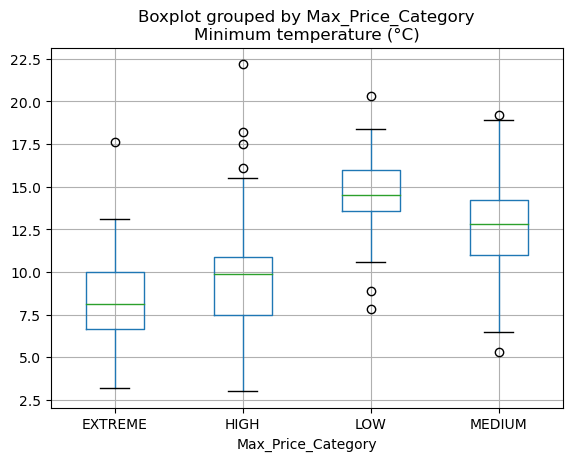

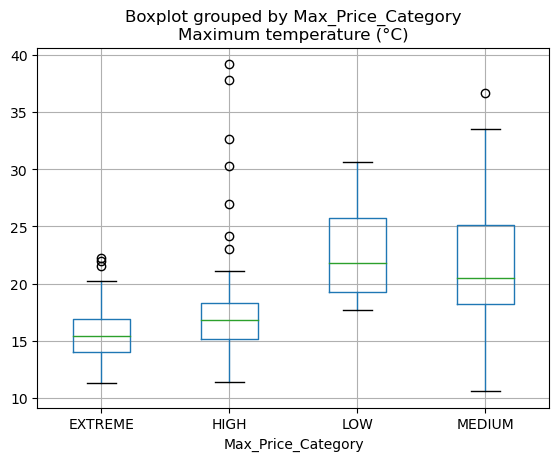

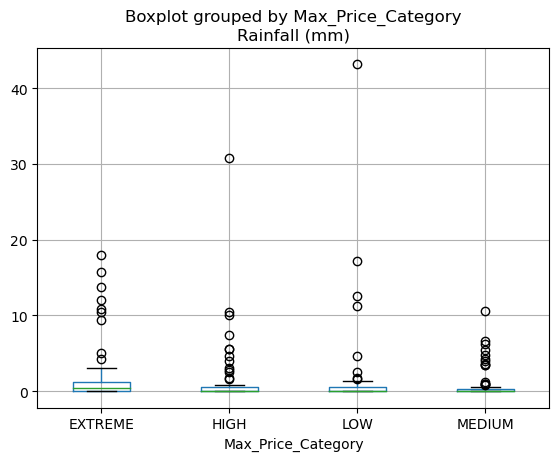

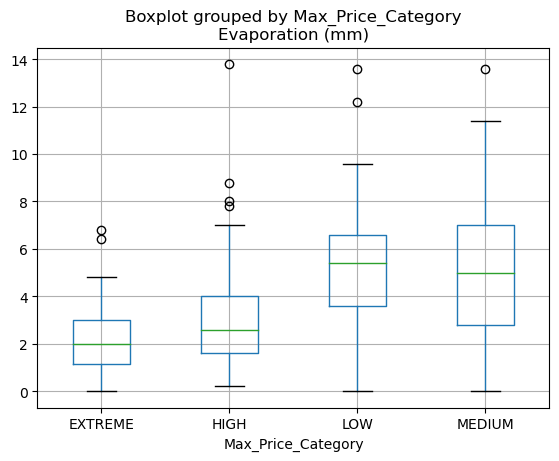

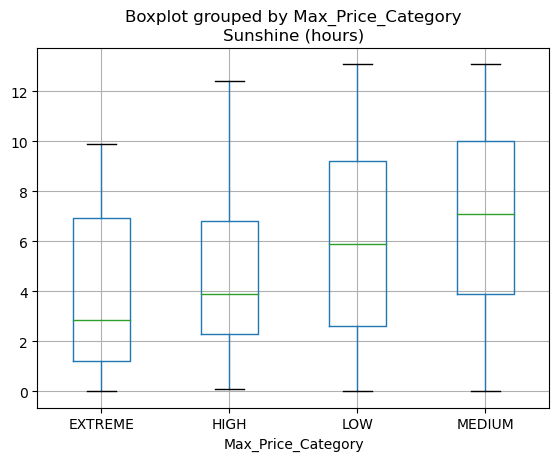

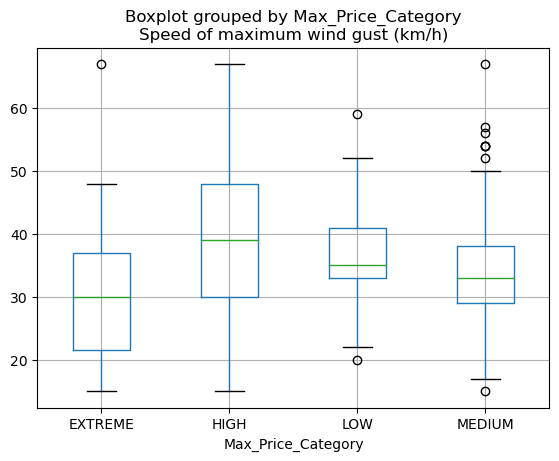

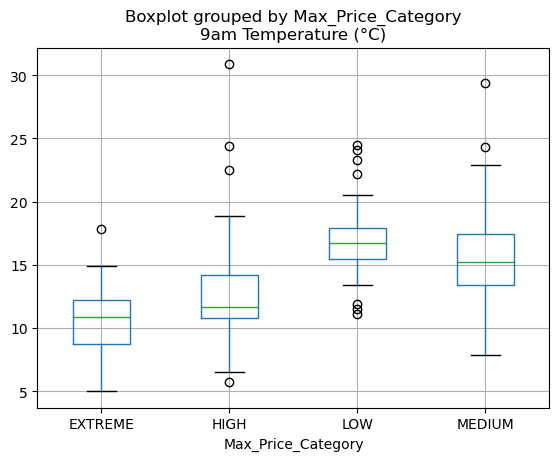

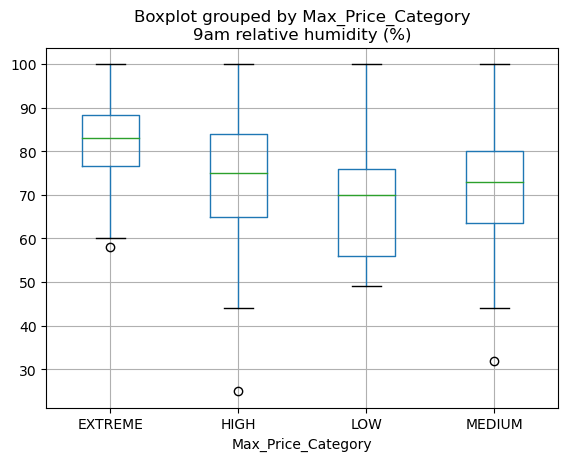

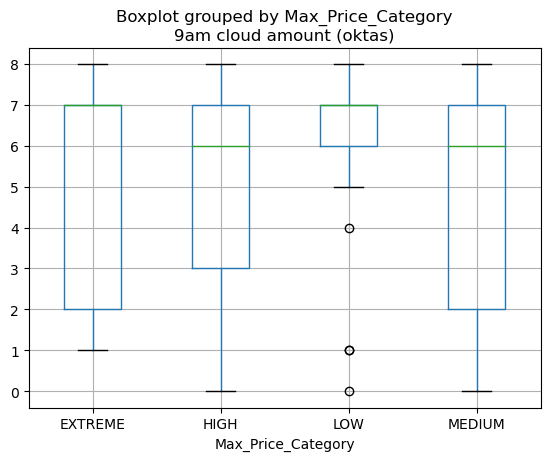

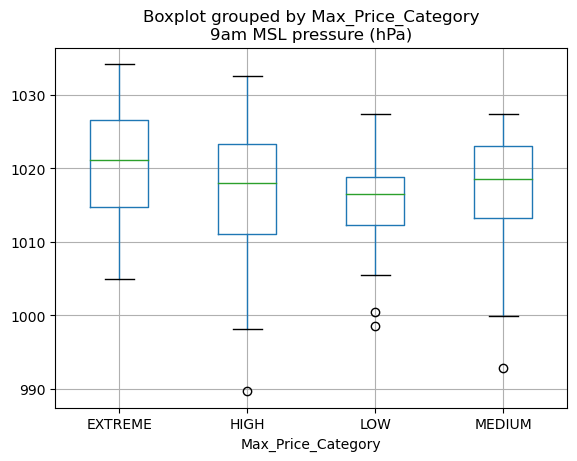

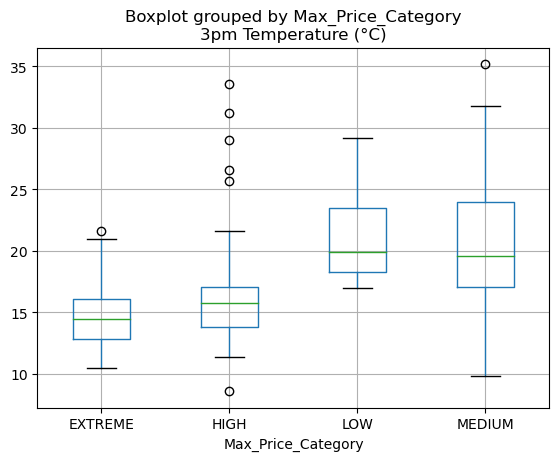

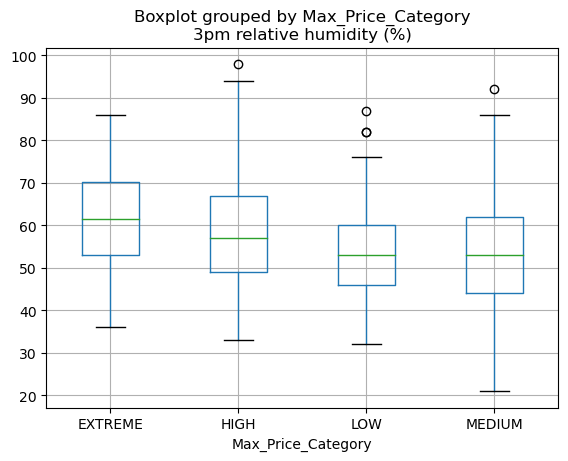

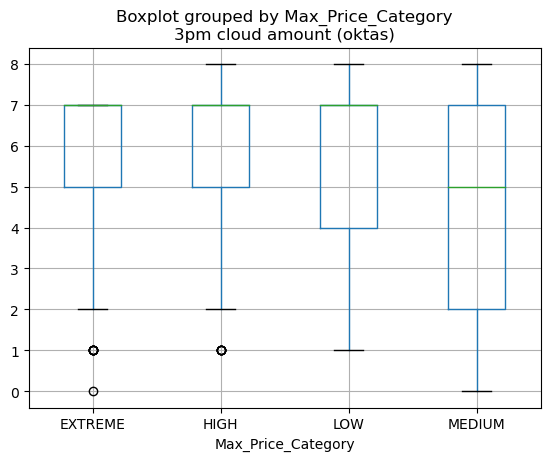

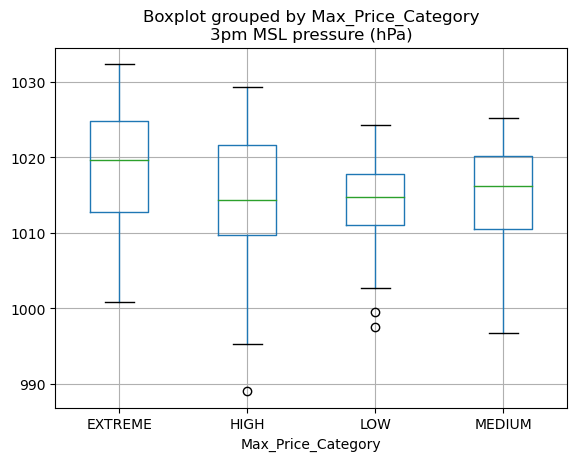

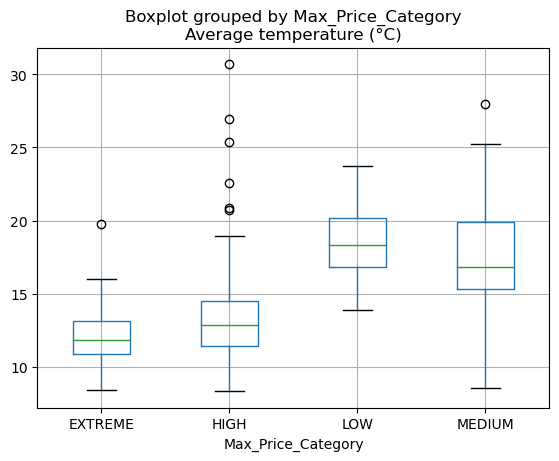

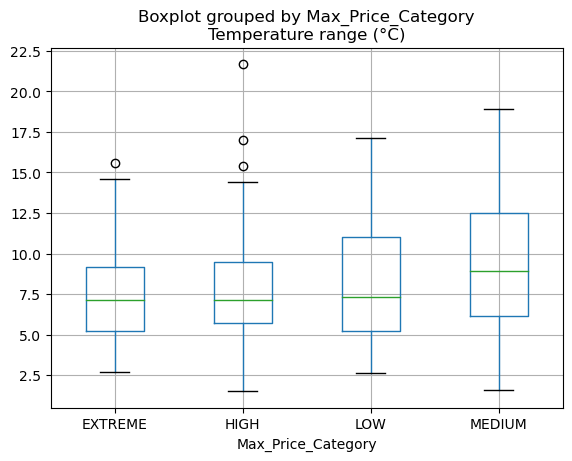

In [19]:
for column in data1:
    if data1[column].dtypes == 'float64' or data1[column].dtypes == 'int64' :
        data1.boxplot(column, by ='Max_Price_Category')

In [20]:
import scipy

for column in data1:
    if data1[column].dtypes == 'float64' or data1[column].dtypes == 'int64':

        p_values=scipy.stats.f_oneway(data1[column][data1['Max_Price_Category'] == 'LOW'],
                    data1[column][data1['Max_Price_Category'] == 'MEDIUM'],
                    data1[column][data1['Max_Price_Category'] == 'HIGH'],
                    data1[column][data1['Max_Price_Category'] == 'EXTREME'])
        print(column,p_values,'\n')

Minimum temperature (°C) F_onewayResult(statistic=43.157745716061086, pvalue=3.2215853333829425e-22) 

Maximum temperature (°C) F_onewayResult(statistic=29.799678894923765, pvalue=2.411656548780436e-16) 

Rainfall (mm) F_onewayResult(statistic=1.416763161884653, pvalue=0.2385680362413236) 

Evaporation (mm) F_onewayResult(statistic=24.59627559157367, pvalue=7.302455004359034e-14) 

Sunshine (hours) F_onewayResult(statistic=9.319796213120343, pvalue=7.636002610266395e-06) 

Speed of maximum wind gust (km/h) F_onewayResult(statistic=7.863573807437506, pvalue=5.086061547900228e-05) 

9am Temperature (°C) F_onewayResult(statistic=35.44846237521846, pvalue=6.549711047196577e-19) 

9am relative humidity (%) F_onewayResult(statistic=9.828204607191164, pvalue=3.958740219051292e-06) 

9am cloud amount (oktas) F_onewayResult(statistic=3.562678600397662, pvalue=0.014948972205136413) 

9am MSL pressure (hPa) F_onewayResult(statistic=4.774198658261851, pvalue=0.0030030384874002534) 

3pm Temperatur

##### Having p values will help us to choose some features for our model, we decide to use 5 features which are independent , The first one is Average temperature ,  the second one is Evaporation and third one is Humidity and forth is sunshine and last is Speed of maximum wind gust (km/h)

In [21]:
data3 = data1[['Average temperature (°C)', 'Evaporation (mm)', '9am relative humidity (%)', 'Sunshine (hours)', 'Speed of maximum wind gust (km/h)']]
classlabel=result['Max_Price_Category']


X_train, X_test, y_train, y_test = train_test_split(data3,classlabel, train_size=0.8, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6041666666666666


C:\Users\foadm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##### Now we use chi squared to find five best features for our model:

In [22]:
from sklearn.feature_selection import SelectKBest , chi2, mutual_info_classif , mutual_info_regression
from sklearn.model_selection import train_test_split
data4= data1. select_dtypes(exclude= object)
classlable = data1['Max_Price_Category']
X_train, X_test, y_train, y_test = train_test_split(data4,classlabel, train_size=0.8, random_state=42)
feature_selection = SelectKBest(chi2, k = 5)
X_train = feature_selection.fit_transform(X_train, y_train)
X_test = feature_selection.transform(X_test)

In [23]:
feature_selection.get_feature_names_out()

array(['Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Evaporation (mm)', '9am Temperature (°C)',
       'Average temperature (°C)'], dtype=object)

##### We see that in 5 best features 4 features highly corrolated , then we change k to find five best features:

In [24]:
from sklearn.feature_selection import SelectKBest , chi2, mutual_info_classif , mutual_info_regression
from sklearn.model_selection import train_test_split
data4= data1. select_dtypes(exclude= object)
classlable = data1['Max_Price_Category']
X_train, X_test, y_train, y_test = train_test_split(data4,classlabel, train_size=0.8, random_state=42)
feature_selection = SelectKBest(chi2, k = 9)
X_train = feature_selection.fit_transform(X_train, y_train)
X_test = feature_selection.transform(X_test)

In [25]:
feature_selection.get_feature_names_out()

array(['Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Evaporation (mm)', 'Sunshine (hours)',
       'Speed of maximum wind gust (km/h)', '9am Temperature (°C)',
       '9am relative humidity (%)', '3pm Temperature (°C)',
       'Average temperature (°C)'], dtype=object)

##### Because we write our code before knowing feature selection we used Anova and great news is that these two method confirmed each other, in both method we find same best features.